<a href="https://colab.research.google.com/github/Chinmaya-3141/Machine-Learning-Emission-Data/blob/edit1/25_01_2023_MSE_Presentation_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gas Turbine Emission Data**

### Fetch Data

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip

--2023-02-13 05:48:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1090294 (1.0M) [application/x-httpd-php]
Saving to: ‘pp_gas_emission.zip’

pp_gas_emission.zip 100%[===================>]   1.04M  --.-KB/s    in 0.06s   

2023-02-13 05:48:22 (18.2 MB/s) - ‘pp_gas_emission.zip’ saved [1090294/1090294]



In [2]:
!unzip pp_gas_emission.zip

Archive:  pp_gas_emission.zip
  inflating: gt_2011.csv             
  inflating: gt_2012.csv             
  inflating: gt_2013.csv             
  inflating: gt_2014.csv             
  inflating: gt_2015.csv             


## Preprocessing

### Import Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_2015=pd.concat([pd.read_csv("gt_2011.csv"),\
                     pd.read_csv("gt_2012.csv"),\
                     pd.read_csv("gt_2013.csv"),\
                     pd.read_csv("gt_2014.csv"),\
                     pd.read_csv("gt_2015.csv")],\
                    axis=0)

In [5]:
data_2015.shape

(36733, 11)

In [6]:
data_2015.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


### EDA

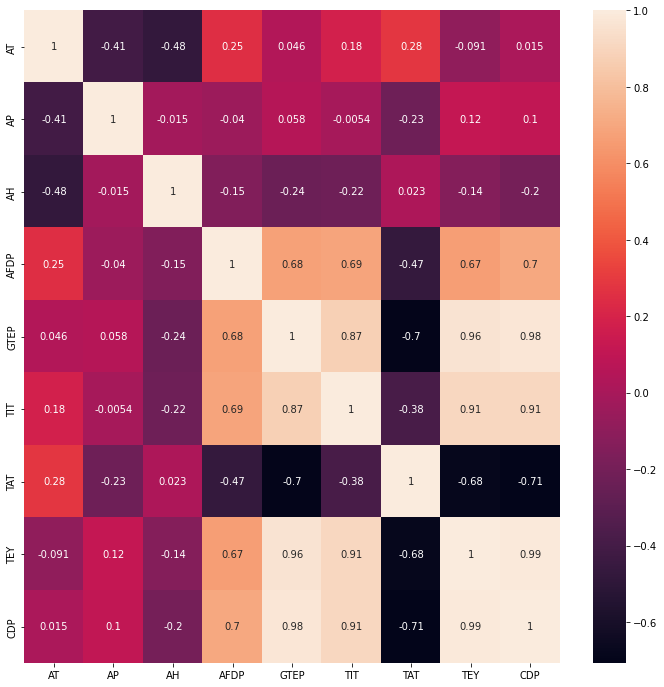

In [7]:
# Showing correlation of all variables among each other and not selecting target variables

plt.figure(figsize=(12,12))
sns.heatmap(data_2015.loc[:,'AT':'CDP'].corr(),annot=True)
# plt.savefig("corr.png")

In [8]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=(16,7)
# f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(1,9)
# sns.boxplot(data=data_2015['AT'], ax=ax1, palette = 'coolwarm')
# sns.boxplot(data=data_2015['AP'], ax=ax2)
# sns.boxplot(data=data_2015['AH'], ax=ax3, palette = 'coolwarm')
# sns.boxplot(data=data_2015['AFDP'], ax=ax4)
# sns.boxplot(data=data_2015['GTEP'], ax=ax5, palette='coolwarm')
# sns.boxplot(data=data_2015['TIT'], ax=ax6)
# sns.boxplot(data=data_2015['TAT'], ax=ax7, palette='coolwarm')
# sns.boxplot(data=data_2015['TEY'], ax=ax8)
# sns.boxplot(data=data_2015['CDP'], ax=ax9, palette = 'coolwarm')
# f.tight_layout()
# plt.savefig("boxplot.png")

In [9]:
# data_2015.to_csv()

### Outlier Treatment

In [10]:
#LOF is a robust outlier detection method in ML

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [11]:
# Scaling all variables except for target variables

data_2015_scaled= StandardScaler().fit_transform(data_2015.loc[:,'AT':'CDP'])

In [12]:
data_2015.shape

(36733, 11)

In [13]:
# Using Local Outlier Factor to identify potential outliers

lof=LocalOutlierFactor(n_neighbors=5)
pred = lof.fit_predict(data_2015_scaled)

In [14]:
pd.Series(pred).value_counts()

 1    35425
-1     1308
dtype: int64

In [15]:
# initialising an empty array, passing no of rows/entries using shape[0]
# storing predictions for 5,7,9 neighbours in all_preds by looping n_neigh over range(5,10,2)

all_preds = np.zeros(shape=(data_2015_scaled.shape[0],3))
i=0
for n_neigh in range(5,10,2):
  lof=LocalOutlierFactor(n_neighbors=n_neigh)
  pred=lof.fit_predict(data_2015_scaled)
  all_preds[:,i]=pred
  i+=1

In [16]:
all_preds

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1.],
       [-1., -1.,  1.],
       [ 1.,  1.,  1.]])

In [17]:
# Sum along rows, that is sum prediction whether outlier or not according to 5,7 and 9 neighbour prediction

outlier_preds = all_preds.sum(axis=1)

In [20]:
# outlier_preds

array([ 3.,  3.,  3., ...,  3., -1.,  3.])

In [24]:
# Summed values

# np.unique(outlier_preds)

array([-3., -1.,  1.,  3.])

In [18]:
# Pick points which are considered outliers by at least two out of three n_neighbours lof
# This will happen when sum of row is 1 or 3
# final_outlier assigns 1 to outliers
# This is done by checking if rowsum is >= 1, that is 1 or 3
# If two lof numbers say not outlier, we keep it
# Like a voting method.

final_outlier=np.where(outlier_preds>=1,1,-1)

In [19]:
final_outlier

array([ 1,  1,  1, ...,  1, -1,  1])

In [26]:
# Checking percentage of Outliers to non-outliers from our prediction

pd.Series(final_outlier).value_counts(normalize=True)

 1    0.973784
-1    0.026216
dtype: float64

Consensus outliers:

(963/36733)*100 \
= 2.6216208858519587%

In [ ]:
data_2015_no_outlier = data_2015[final_outlier==1]

## Multiple Linear Regression

### Import Modules

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
columns=data_2015.columns

In [ ]:
columns

In [ ]:
# data_2015_NOx=data_2015_no_outlier.drop('CO',axis=1)
# data_2015_CO=data_2015_no_outlier.drop('NOX',axis=1)

### Linear Regression

In [ ]:
# Join column numbers 1 to 9 to pass string with formula for CO

f1='CO~'+'+'.join(columns[:9])
f1

In [ ]:
r_co=sm.ols(formula=f1, data=data_2015_no_outlier)

In [ ]:
result_co=r_co.fit()

In [ ]:
result_co.summary()

In [ ]:
# Join column numbers 1 to 9 to pass string with formula for NOx

f2='NOX~'+'+'.join(columns[:9])
f2

'NOX~AT+AP+AH+AFDP+GTEP+TIT+TAT+TEY+CDP'

In [ ]:
# OLS Regression

r_nox=sm.ols(formula=f2, data=data_2015_no_outlier)

In [ ]:
result_nox=r_nox.fit()

In [ ]:
result_nox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     4268.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        07:24:19   Log-Likelihood:            -1.2546e+05
No. Observations:               35770   AIC:                         2.509e+05
Df Residuals:                   35760   BIC:                         2.510e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.5671     12.162     -5.062      0.000     -85.406     -37.728
AT            -1.7649      0.017   -106.504      0.000      -1.797      -1.732
AP            -0.2360      0.008    -28.839      0.000      -0.252      -0.220
AH            -0.2224      0.004    -60.016      0.000      -0.230      -0.215
AFDP           0.7286      0.088      8.295      0.000       0.556       0.901
GTEP          -0.1015      0.056     -1.815      0.070      -0.211       0.008
TIT            1.4144      0.015     93.655      0.000       1.385       1.444
TAT           -1.5245      0.020    -76.244      0.000      -1.564      -1.485
TEY           -1.9461      0.044    -44.304      0.000      -2.032      -1.860
CDP           -1.9019      0.620     -3.067      0.002      -3.117      -0.686
==============================================================================
Omnibus:                     7249.078   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26041.843
Skew:                           0.996   Prob(JB):                         0.00
Kurtosis:                       6.675   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variable selection using Variance Inflation Factor (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
variance_inflation_factor(data_2015_no_outlier.loc[:,'AT':'CDP'].values,0)

46.86457466862405

In [ ]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
X_1 = data_2015_no_outlier.loc[:,'AT':'CDP'].copy()

In [ ]:
vif_scores = {k: v for k, v in zip(X_1.columns,
                                   [variance_inflation_factor(X_1.values, i) \
                                    for i in range(len(X_1.columns))])}

In [ ]:
vif_scores_sorted = {k:v for k, v in sorted(vif_scores.items(),key=lambda item:item[1], reverse = True)}

In [ ]:
vif_scores_sorted

{'TIT': 121734.40451561549,
 'TAT': 63794.72222418256,
 'AP': 28307.64508797133,
 'CDP': 27875.950114991723,
 'TEY': 13827.838631867879,
 'GTEP': 1057.1442758291464,
 'AFDP': 67.3993997468524,
 'AT': 46.86457466862405,
 'AH': 46.00271067397057}

In [ ]:
# X_1.columns.drop('TIT')

#### Defining functions to select variables with lowest VIF

In [ ]:
def var_selection_vif(data_exog: pd.DataFrame, th: int=5):
  vif_scores = {k: v for k, v in zip(data_exog.columns,
                                     [variance_inflation_factor(data_exog.values,i)\
                                      for i in range(len(data_exog.columns))])}
  vif_scores_sorted = {k:v for k, v in sorted(vif_scores.items(),
                                            key=lambda item:item[1],
                                            reverse = True)}
  if vif_scores_sorted[list(vif_scores_sorted.keys())[0]]>th:
    vars = data_exog.columns.drop(list(vif_scores_sorted.keys())[0])
    return (data_exog[vars], vif_scores_sorted)
  else:
    return(data_exog, vif_scores_sorted)

In [ ]:
n_old = len(X_1.columns)
n_new = 0
while n_old != n_new:
  X_1, vif = var_selection_vif(X_1)
  print(vif)
  n = len(X_1.columns)
  n_old = n_new
  n_new= n

{'TIT': 121734.40451561549, 'TAT': 63794.72222418256, 'AP': 28307.64508797133, 'CDP': 27875.950114991723, 'TEY': 13827.838631867879, 'GTEP': 1057.1442758291464, 'AFDP': 67.3993997468524, 'AT': 46.86457466862405, 'AH': 46.00271067397057}
{'CDP': 26213.793293308318, 'AP': 25132.999808507677, 'TAT': 16654.669880172027, 'TEY': 12389.760061720457, 'GTEP': 998.8772137798093, 'AFDP': 64.11990672897241, 'AH': 45.076480065618966, 'AT': 42.38049924200662}
{'AP': 10427.885813072946, 'TAT': 10285.376502461655, 'TEY': 1652.4813561896851, 'GTEP': 881.4367428504926, 'AFDP': 63.55045455859313, 'AH': 44.157242132533455, 'AT': 18.663482430935414}
{'TEY': 1633.9781998684982, 'GTEP': 820.2615455119885, 'TAT': 273.0289962365141, 'AFDP': 61.77791042516804, 'AH': 43.633800292642555, 'AT': 14.028633028570969}
{'TAT': 117.53107832474556, 'GTEP': 75.85442546047754, 'AFDP': 57.56605380964737, 'AH': 43.38510835859359, 'AT': 10.44256264426581}
{'AFDP': 56.88593015304628, 'GTEP': 54.566599149677266, 'AH': 14.490126

### Regression with variables having appropriate VIF

In [ ]:
r_final_co = sm.ols(formula='CO~AT+AH', 
                 data = data_2015_no_outlier[list(X_1.columns)+['CO']])
result_final_co = r_final_co.fit()
print(result_final_co.summary())

In [ ]:
r_final_nox = sm.ols(formula='NOX~AT+AH', 
                 data = data_2015_no_outlier[list(X_1.columns)+['NOX']])
result_final_nox = r_final_nox.fit()
print(result_final_nox.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     8574.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        07:24:25   Log-Likelihood:            -1.3151e+05
No. Observations:               35770   AIC:                         2.630e+05
Df Residuals:                   35767   BIC:                         2.630e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.5104      0.400    226.492      0.0

### Variable selection using Lasso regression coefficients

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg1 = Lasso(alpha=2)
lasso_reg1.fit(X=data_2015_no_outlier.loc[:,'AT':'CDP'],\
              y=data_2015_no_outlier['CO'])

Lasso(alpha=2)

In [ ]:
CO_vars = {k:v for k,v in zip(data_2015_no_outlier.loc[:,'AT':'CDP'].columns, lasso_reg1.coef_)}

{'AT': -0.0,
 'AP': 0.0,
 'AH': -0.0,
 'AFDP': -0.0,
 'GTEP': 0.0,
 'TIT': -0.0857943408930881,
 'TAT': -0.01829257828806067,
 'TEY': 0.0,
 'CDP': 0.0}

In [ ]:
lasso_reg1.score(X=data_2015_no_outlier.loc[:,'AT':'CDP'],\
              y=data_2015_no_outlier['CO'])

0.5374513201552922

In [ ]:
lasso_reg2 = Lasso(alpha=2)
lasso_reg2.fit(X=data_2015_no_outlier.loc[:,'AT':'CDP'],\
               y=data_2015_no_outlier['NOX'])

In [ ]:
NOx_vars = {k:v for k,v in zip(data_2015_no_outlier.loc[:,'AT':'CDP'].columns, lasso_reg2.coef_)}

In [ ]:
lasso_reg2.score(X=data_2015_no_outlier.loc[:,'AT':'CDP'],\
                 y=data_2015_no_outlier['NOX'])

### Analysis of errors

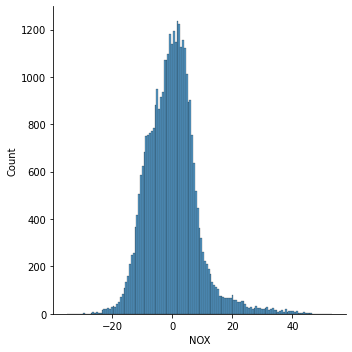

In [ ]:
errors1 = data_2015_no_outlier['CO'] - lasso_reg1.predict(data_2015_no_outlier.loc[:,'AT':'CDP'])
d1=sns.displot(errors)
plt.savefig('error-plot-CO.png')

In [ ]:
errors2 = data_2015_no_outlier['NOX'] - lasso_reg2.predict(data_2015_no_outlier.loc[:,'AT':'CDP'])
d2=sns.displot(errors)
plt.savefig('error-plot-NOx.png')

In [ ]:
import statsmodels.api as smf

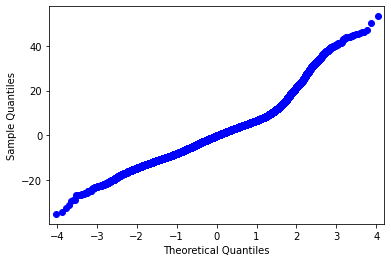

<Figure size 432x288 with 0 Axes>

In [ ]:
smf.qqplot(errors1)
plt.show()
plt.savefig('error-dist-CO.png')

In [ ]:
smf.qqplot(errors2)
plt.show()
plt.savefig('error-dist-NOx.png')

### Multiple Linear Regression with relevant variables

In [ ]:
r_co_final_combined = sm.ols(formula='CO~AT+AH+TIT+TAT+TEY',\
                             data = data_2015[['AT','AP','AH','TIT','TAT']+['CO']])
result_co = r_co_final_combined.fit()
print(result_co.summary())

In [ ]:
r_nox_final_combined = sm.ols(formula='NOX~AT+AP+AH+TIT+TAT+TEY',\
                              data = data_2015[['AT','AP','AH','TIT','TAT','TEY']+['NOX']])
result_nox = r_nox_final_combined.fit()
print(result_final_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     6546.
Date:                Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                        07:01:56   Log-Likelihood:            -1.2904e+05
No. Observations:               36733   AIC:                         2.581e+05
Df Residuals:                   36726   BIC:                         2.582e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -83.1243     10.420     -7.978      0.0

### Cook's Distance

In [ ]:
#cook's distnace tells the change in model when a single datapoint is dropped

In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [ ]:
inf = influence(result_final_new)

In [ ]:
inf.cooks_distance

(0       0.000021
 1       0.000016
 2       0.000015
 3       0.000024
 4       0.000026
           ...   
 7379    0.000470
 7380    0.000509
 7381    0.000563
 7382    0.000015
 7383    0.000887
 Length: 36733, dtype: float64,
 array([1.        , 1.        , 1.        , ..., 0.99999937, 1.        ,
        0.99999843]))

In [31]:
# Something needs to be changed here

inf.summary_frame()[inf.summary_frame()['cooks_d']>=4/7384]

NameError: ignored

## Machine Learning models

### Importing Relevant modules

In [ ]:
from hyperopt import fmin, hp, STATUS_OK, tpe , Trials
from hyperopt.pyll.base import scope
import hyperopt

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [ ]:
lin_reg = LinearRegression()
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gbm_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()

### Setting up parameter search space for hyperopt

In [ ]:
gt_new = data_2015.loc[:,'AT':'CO']
gt_new.shape

In [ ]:
param_dt={
    'max_depth': scope.int(hp.quniform('max_depth',2,20,1)),
    'ccp_alpha': hp.uniform('ccp_alpha',0.001,0.1)
}

param_rf={
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'max_features':hp.choice('max_features',list(range(2,7)))
}

param_gbm = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1)
}

param_xgb = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1),
    'colsample_bytree':hp.uniform('colsample_bytree',0.2,0.8)
}

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(gt_new.loc[:, 'AT':'CDP'],gt_new['CO'],test_size=0.3, random_state=123)

In [ ]:
def rmse(y_act, y_pred):
  return (np.sqrt(np.mean((y_act-y_pred)**2)))

rmse = make_scorer(rmse, greater_is_better=False)

In [ ]:
def hp_obj_func_dt(param):
  dt= DecisionTreeRegressor(**param)
  out=cross_val_score(dt, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [ ]:
def surr_func_dt(params):
  perf= hp_obj_func_dt(params)
  return {'loss':-perf,'status': STATUS_OK}

### Linear Regression

In [ ]:
lin_reg.fit(x_train, y_train)
pred_lin_reg = lin_reg.predict(x_test)
print(mean_squared_error(pred_lin_reg, y_test))

### Decision Tree

In [ ]:
trials = Trials()
best_dt = fmin(surr_func_dt, space=param_dt, algo=tpe.suggest,
               max_evals=100, trials=trials)
print('best_dt:')
print(best_dt)

NameError: ignored

In [ ]:
dt_reg = DecisionTreeRegressor(**best_dt)
dt_reg.fit(x_train, y_train)
pred_dt = dt_reg.predict(x_test)
print(mean_squared_error(pred_dt, y_test))

### Random forest




In [ ]:
def hp_obj_func_rf(param):
  rf= RandomForestRegressor(**param)
  out=cross_val_score(rf, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [ ]:
def surr_func_rf(params):
  perf= hp_obj_func_rf(params)
  return {'loss':-perf,'status': STATUS_OK}

In [ ]:
trials = Trials()
best_rf = fmin(surr_func_rf, space=param_rf, algo=tpe.suggest,
               max_evals=25, trials=trials)
print('best_rf:')
print(best_rf)

-1.1128655635510616
-1.1089172416386133
-1.1151557623172412
-1.1069073912730325
-1.1114110673653943
-1.1168912571668366
-1.1209253482433301
-1.111107774841221
-1.1187227229618961
-1.1120437923249586
-1.1136068330441582
-1.1086832458397278
-1.1202274079002483
-1.1198395310456355
-1.1144885781418306
-1.1206308210423064
-1.1150215279110016
-1.1129204703182372
-1.1145372953323753
-1.1134523054647283
-1.107681513748841
-1.1102082109653035
-1.1119139934768754
-1.109601665528748
-1.1091171131952193
100%|██████████| 25/25 [55:24<00:00, 132.96s/it, best loss: 1.1069073912730325]
best_rf:
{'max_features': 1, 'n_estimators': 400.0}


In [ ]:
best_rf={'max_features': 2, 'n_estimators': 451}

In [ ]:
rf_reg = RandomForestRegressor(**best_rf)
rf_reg.fit(x_train, y_train)
pred_rf = rf_reg.predict(x_test)
print(mean_squared_error(pred_rf, y_test))

In [ ]:
plt.figure(figsize=(12,12))
for i in range(1,10):
  plt.subplot(3,3,i)
  sns.distplot(data_2015.iloc[:i-1])

### (Missing) GBM

### XgBoost

In [ ]:
def hp_obj_func_xgb(param):
  xgb= XGBRegressor(**param)
  out=cross_val_score(xgb, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [ ]:
def surr_func_xgb(params):
  perf= hp_obj_func_xgb(params)
  return {'loss':-perf,'status': STATUS_OK}

In [ ]:
trials = Trials()
best_xgb = fmin(surr_func_xgb, space=param_xgb, algo=tpe.suggest,
               max_evals=100, trials=trials)
print('best_xgb:')
print(best_xgb)

[15:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-1.2418692722543576
[15:32:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now depre

In [ ]:
# best_xgb = {'colsample_bytree': 0.5904951775918889, 'learning_rate': 0.024729072063200287, 'max_depth': 5, 'n_estimators': 267}

In [ ]:
best_xgb = {'colsample_bytree': 0.7974445913518547, 'learning_rate': 0.09830911482175203, 'max_depth': 5, 'n_estimators': 380}

In [ ]:
xgb_reg = XGBRegressor(**best_xgb)
xgb_reg.fit(x_train, y_train)
pred_xgb = xgb_reg.predict(x_test)
print(mean_squared_error(pred_xgb, y_test))

[16:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.2103713408160324


In [ ]:
xgb_reg = XGBRegressor(**best_xgb)
xgb_reg.fit(x_train, y_train)
pred_xgb = xgb_reg.predict(x_test)
print(mean_squared_error(pred_xgb, y_test))

[16:15:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
1.2842989616314378


In [ ]:
plt.figure(figsize=(12,12))
for i in range(1,10):
  plt.subplot(3,3,i)
  sns.distplot(data_2015.iloc[:i-1])

### (Possible addition) LightGBM

#Hypothesis Testing

##Z-Test 2 sample test


In [ ]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest as ztest
import pandas as pd



In [ ]:
df1=pd.concat([pd.read_csv("gt_2011.csv"),pd.read_csv("gt_2012.csv"),pd.read_csv("gt_2013.csv"),pd.read_csv("gt_2014.csv")],axis=0)
df2=pd.read_csv("gt_2015.csv")
df3=pd.read_csv("gt_2014.csv")


In [ ]:
ztest(df3['NOX'], value=np.mean(df2['NOX']))

Conclusion: The mean value of NOX emission for 2015 is  equal to the mean value of the NOX emissions of years from 2014.

In [ ]:
ztest(df3['CO'], value= np.mean(df2['CO'])) 

Conclusion: The mean value of CO emission for 2015 is not equal to the mean value of the CO emissions of years from 2014.

##ANOVA

In [ ]:
from scipy.stats import f_oneway
# result= f_oneway(pd.read_csv("gt_2011.csv")['NOX'],pd.read_csv("gt_2012.csv")['NOX'],pd.read_csv("gt_2013.csv")['NOX'],pd.read_csv("gt_2014.csv")['NOX'],df2['NOX'])
result= f_oneway(pd.read_csv("gt_2011.csv")['NOX'],pd.read_csv("gt_2012.csv")['NOX'])
result